In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

mainpath = '../datasets/'

df_dogumhizi = pd.read_csv(mainpath + 'dogumhizi.csv', encoding='utf-8')

df_2022evlilikyas = pd.read_csv(mainpath + '2022evlilikyas.csv', encoding='utf-8')

df_gdpProvince = pd.read_csv(mainpath + 'gdp_province.csv', encoding='utf-8')

df_ihracat = pd.read_csv(mainpath + 'ihracat_dolar_2022.csv', encoding='utf-8')

df_starbucks = pd.read_csv(mainpath + 'starbucks.csv', encoding='utf-8')

highschool_education_rate_according_meb = pd.read_csv(mainpath + 'highschool_education_rate_according_meb.csv', encoding='utf-8')

df_election_results = pd.read_csv(mainpath + 'election_results.csv', encoding='utf-8')

df_dogumhizi['city'] = df_dogumhizi['city'].str.strip()
df_2022evlilikyas['city'] = df_2022evlilikyas['city'].str.strip()
df_gdpProvince['city'] = df_gdpProvince['city'].str.strip()
df_ihracat['city'] = df_ihracat['city'].str.strip()
df_starbucks['city'] = df_starbucks['city'].str.strip()
highschool_education_rate_according_meb['city'] = highschool_education_rate_according_meb['city'].str.strip()
df_election_results['city'] = df_election_results['city'].str.strip()

# Merge the DataFrames based on the 'city' column
# Merge DataFrames on 'city' column
df_merged = pd.merge(df_dogumhizi, df_2022evlilikyas, on='city',how = 'left')
df_merged = pd.merge(df_merged, df_gdpProvince, on='city' , how = 'left')
df_merged = pd.merge(df_merged, df_ihracat, on='city', how = 'left')
df_merged = pd.merge(df_merged, df_starbucks, on='city', how = 'left')
df_merged = pd.merge(df_merged, highschool_education_rate_according_meb, on='city', how = 'left')
df_merged = pd.merge(df_merged, df_election_results, on='city', how = 'left')
df_merged['starbucks count'] = df_merged['starbucks count'].fillna(0)

/var/folders/06/dy2vlptx6j36z0t359_s_vq40000gn/T/ipykernel_27294/1916622023.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = coefficient_test_df.corr()


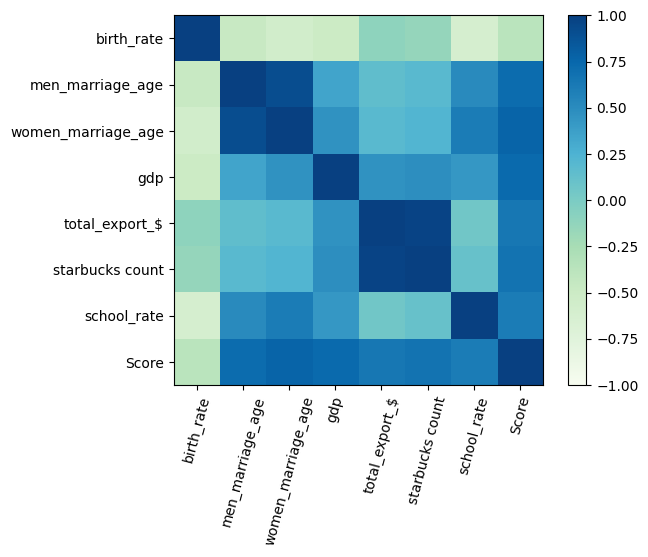

,birth_rate,men_marriage_age,women_marriage_age,gdp,total_export_$,starbucks count,school_rate,Score
birth_rate,1.000000,-0.473261,-0.568548,-0.507136,-0.105273,-0.148201,-0.616771,-0.377283
men_marriage_age,-0.473261,1.000000,0.911599,0.338588,0.145984,0.184355,0.509322,0.716772
women_marriage_age,-0.568548,0.911599,1.000000,0.453397,0.180999,0.225981,0.606558,0.772272
gdp,-0.507136,0.338588,0.453397,1.000000,0.460030,0.476855,0.424800,0.727391
total_export_$,-0.105273,0.145984,0.180999,0.460030,1.000000,0.973199,0.049022,0.636592
starbucks count,-0.148201,0.184355,0.225981,0.476855,0.973199,1.000000,0.107573,0.669935
school_rate,-0.616771,0.509322,0.606558,0.424800,0.049022,0.107573,1.000000,0.601950
Score,-0.377283,0.716772,0.772272,0.727391,0.636592,0.669935,0.601950,1.000000


In [3]:
cols_to_normalize = ['birth_rate', 'men_marriage_age', 'women_marriage_age', 'gdp', 'total_export_$', 'starbucks count', 'school_rate']
coefficients = [1, 1, 1, 1, 1, 1, 1]

coefficient_test_df = df_merged.copy()
# Normalize the features and convert from strings to floats where necessary
scaler = MinMaxScaler()
for col in cols_to_normalize:
    if coefficient_test_df[col].dtype == 'object':  # If the column is of object type (possibly string)
        coefficient_test_df[col] = coefficient_test_df[col].str.replace(' ', '').astype(float)  # Remove spaces and convert to float
    coefficient_test_df[[col]] = scaler.fit_transform(coefficient_test_df[[col]])

# Apply the coefficients
for col, coeff in zip(cols_to_normalize, coefficients):
    coefficient_test_df[col] *= coeff

# Calculate the score for each city
coefficient_test_df['Score'] = coefficient_test_df[cols_to_normalize].sum(axis=1)

corrs = coefficient_test_df.corr()
plt.imshow(corrs, cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()
corrs

/var/folders/06/dy2vlptx6j36z0t359_s_vq40000gn/T/ipykernel_27294/2330266334.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df_merged.corr()


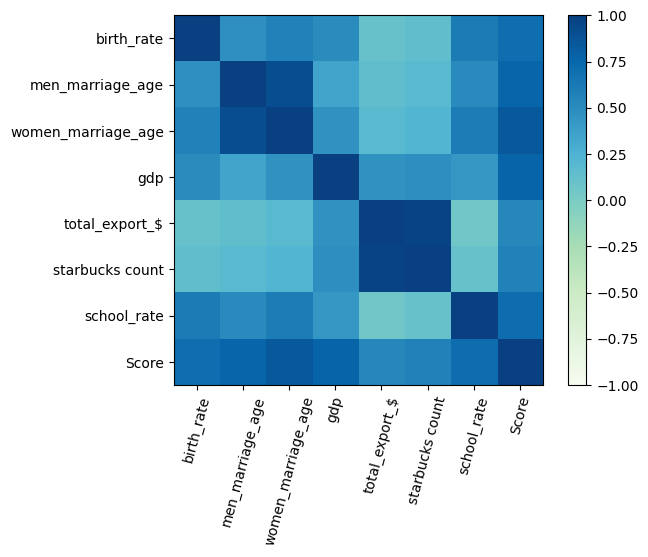

,birth_rate,men_marriage_age,women_marriage_age,gdp,total_export_$,starbucks count,school_rate,Score
birth_rate,1.000000,0.473261,0.568548,0.507136,0.105273,0.148201,0.616771,0.696828
men_marriage_age,0.473261,1.000000,0.911599,0.338588,0.145984,0.184355,0.509322,0.758817
women_marriage_age,0.568548,0.911599,1.000000,0.453397,0.180999,0.225981,0.606558,0.839359
gdp,0.507136,0.338588,0.453397,1.000000,0.460030,0.476855,0.424800,0.770837
total_export_$,0.105273,0.145984,0.180999,0.460030,1.000000,0.973199,0.049022,0.525855
starbucks count,0.148201,0.184355,0.225981,0.476855,0.973199,1.000000,0.107573,0.568803
school_rate,0.616771,0.509322,0.606558,0.424800,0.049022,0.107573,1.000000,0.703889
Score,0.696828,0.758817,0.839359,0.770837,0.525855,0.568803,0.703889,1.000000


In [4]:
cols_to_normalize = ['birth_rate', 'men_marriage_age', 'women_marriage_age', 'gdp', 'total_export_$', 'starbucks count', 'school_rate']
coefficients = [-0.377, 0.716, 0.772, 0.727, 0.636, 0.669, 0.601]

# Normalize the features and convert from strings to floats where necessary
scaler = MinMaxScaler()
for col in cols_to_normalize:
    if df_merged[col].dtype == 'object':  # If the column is of object type (possibly string)
        df_merged[col] = df_merged[col].str.replace(' ', '').astype(float)  # Remove spaces and convert to float
    df_merged[[col]] = scaler.fit_transform(df_merged[[col]])

# Apply the coefficients
for col, coeff in zip(cols_to_normalize, coefficients):
    df_merged[col] *= coeff

# Calculate the score for each city
df_merged['Score'] = df_merged[cols_to_normalize].sum(axis=1)

corrs = df_merged.corr()
plt.imshow(corrs, cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()
corrs


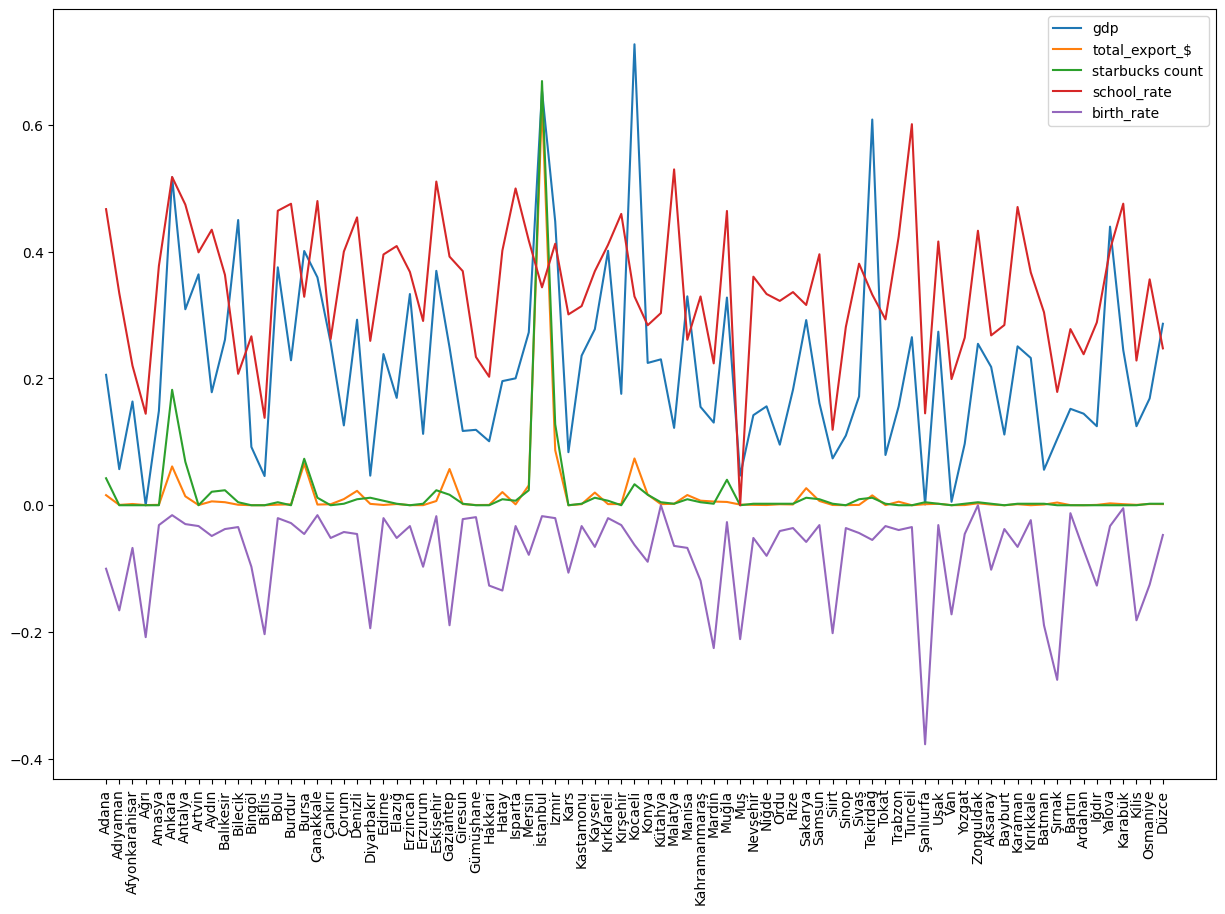

In [5]:
plt.figure(figsize=(15, 10))
plt.plot(df_merged['city'], df_merged['gdp'], label='gdp')
plt.plot(df_merged['city'], df_merged['total_export_$'], label='total_export_$')
plt.plot(df_merged['city'], df_merged['starbucks count'], label='starbucks count')
plt.plot(df_merged['city'], df_merged['school_rate'], label='school_rate')
plt.plot(df_merged['city'], df_merged['birth_rate'], label='birth_rate')
plt.xticks(rotation=90)
plt.legend()
plt.show()


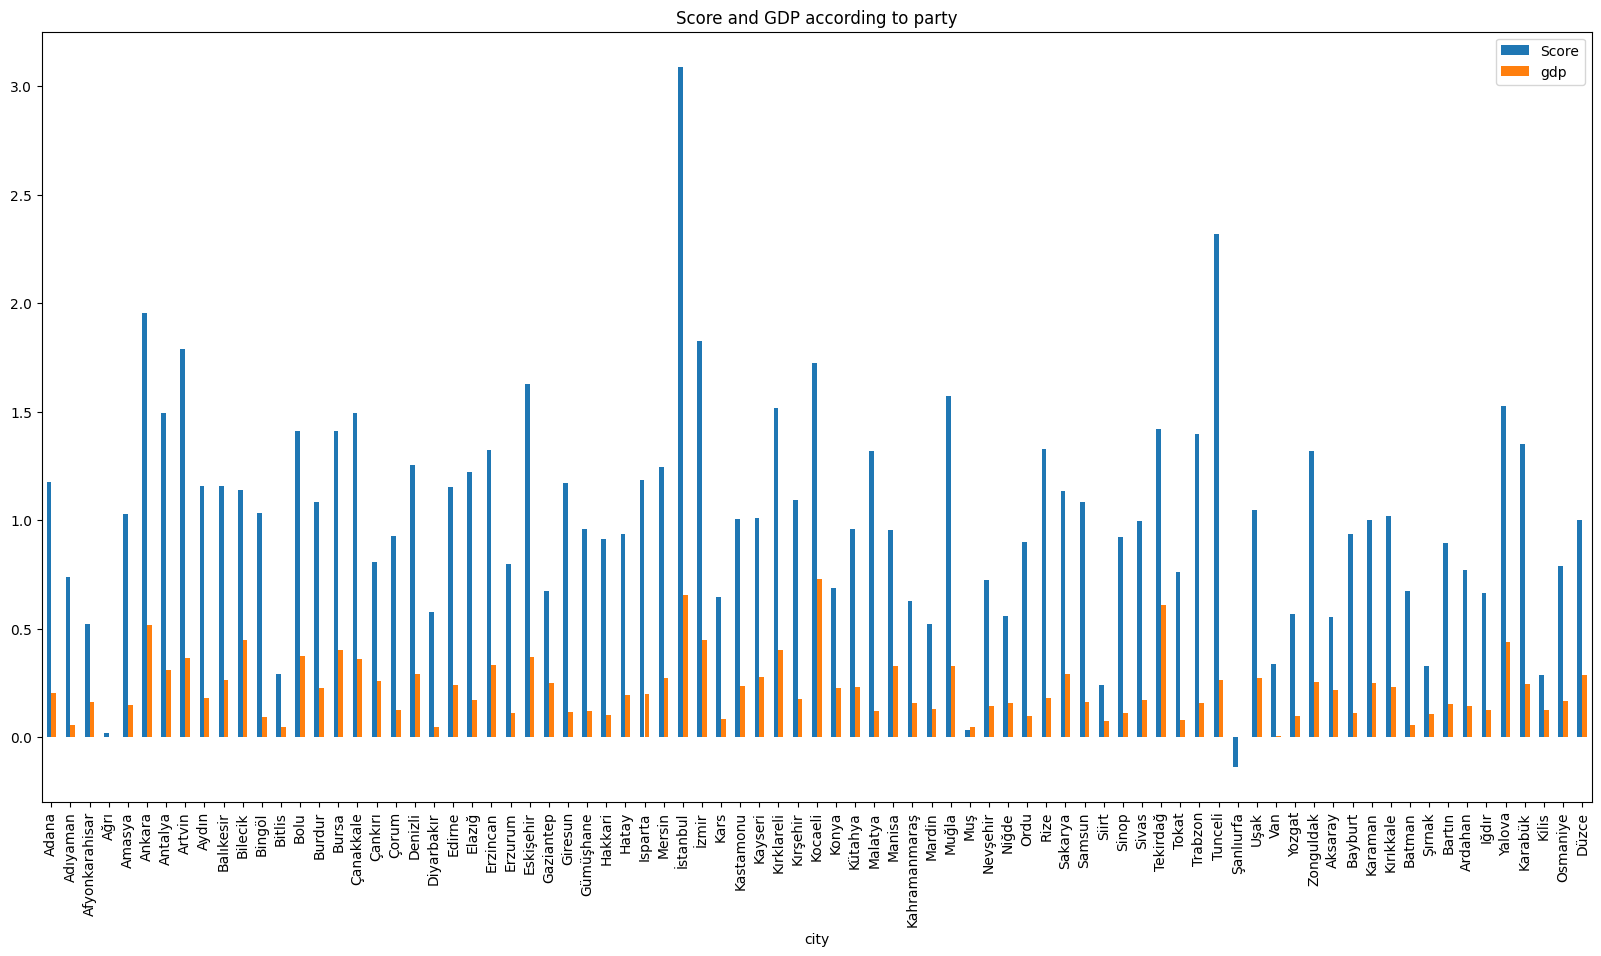

In [4]:
df_merged.plot(x='city', y=['Score', 'gdp'], kind='bar', figsize=(20, 10), title='Score and GDP according to party')
plt.show()

/var/folders/06/dy2vlptx6j36z0t359_s_vq40000gn/T/ipykernel_22359/2317053935.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merged.groupby('party').mean().plot(kind='bar')


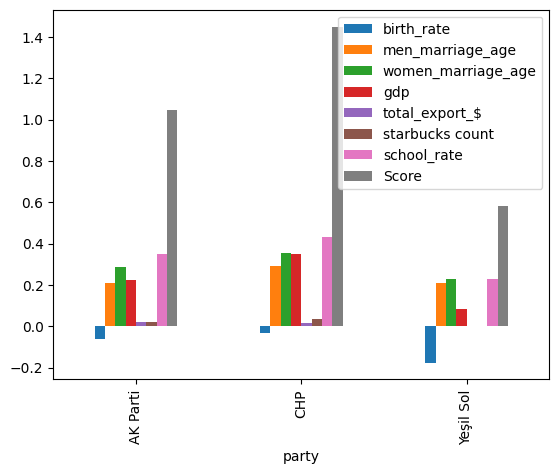

In [6]:
df_merged.groupby('party').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.legend()
plt.show()


/var/folders/06/dy2vlptx6j36z0t359_s_vq40000gn/T/ipykernel_27294/2812470513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey.rename(columns={"NAME_1":"city"},inplace=True)
/var/folders/06/dy2vlptx6j36z0t359_s_vq40000gn/T/ipykernel_27294/2812470513.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey.replace("K. Maras","Kahramanmaraş",inplace=True)
/var/folders/06/dy2vlptx6j36z0t359_s_vq40000gn/T/ipykernel_27294/2812470513.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

<Axes: >

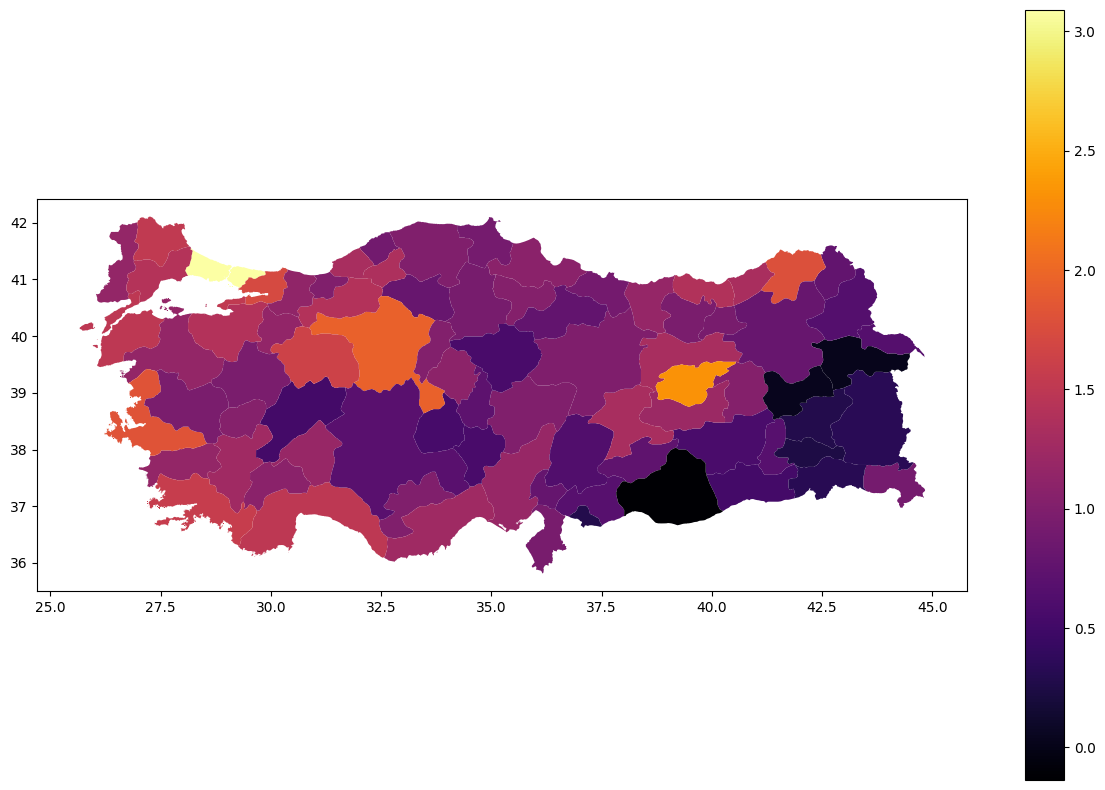

In [6]:
import geopandas as gpd

countries = gpd.read_file("../datasets/countries.geojson")

turkey_geo = gpd.read_file("../datasets/TUR_adm/TUR_adm1.shp")


turkey = turkey_geo[["NAME_1","geometry"]]
turkey.rename(columns={"NAME_1":"city"},inplace=True)
turkey.replace("K. Maras","Kahramanmaraş",inplace=True)
turkey.replace("Çankiri", "Çankırı",inplace=True)
turkey.replace("Adiyaman", "Adıyaman",inplace=True)
turkey.replace("Agri", "Ağrı",inplace=True)
turkey.replace("Aydin", "Aydın",inplace=True)
turkey.replace("Balikesir", "Balıkesir",inplace=True)
turkey.replace("Diyarbakir", "Diyarbakır",inplace=True)
turkey.replace("Eskisehir", "Eskişehir",inplace=True)
turkey.replace("Gümüshane", "Gümüşhane",inplace=True)
turkey.replace("Istanbul", "İstanbul",inplace=True)
turkey.replace("Izmir", "İzmir",inplace=True)
turkey.replace("Kinkkale", "Kırıkkale",inplace=True)
turkey.replace("Kirklareli", "Kırklareli",inplace=True)
turkey.replace("Kirsehir", "Kırşehir",inplace=True)
turkey.replace("Mugla", "Muğla",inplace=True)
turkey.replace("Mus", "Muş",inplace=True)
turkey.replace("Nevsehir", "Nevşehir",inplace=True)
turkey.replace("Sanliurfa", "Şanlıurfa",inplace=True)
turkey.replace("Sirnak", "Şırnak",inplace=True)
turkey.replace("Tekirdag", "Tekirdağ",inplace=True)
turkey.replace("Usak", "Uşak",inplace=True)
turkey.replace("Zinguldak", "Zonguldak",inplace=True)
turkey.replace("Afyon", "Afyonkarahisar",inplace=True)
turkey.replace("Nigde", "Niğde",inplace=True)

geoturkey = turkey.merge(df_merged[["city","Score"]], on="city")

geoturkey.plot(column="Score",cmap="inferno", legend=True, figsize=(15,10))

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df_merged['Score'].values.reshape(-1,1)
y = df_merged['party']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

# Compute cross-validation score
cv_scores = cross_val_score(knn, X, y, cv=5)
print(f"Mean cross-validation score: {cv_scores.mean()}")

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Mean cross-validation score: 0.7654411764705882
[[14  1]
 [ 0  2]]
              precision    recall  f1-score   support

    AK Parti       1.00      0.93      0.97        15
   Yeşil Sol       0.67      1.00      0.80         2

    accuracy                           0.94        17
   macro avg       0.83      0.97      0.88        17
weighted avg       0.96      0.94      0.95        17

